In [3]:
import time
import importlib
import trading_env
importlib.reload(trading_env) 
import trading_env
import os
import gym as gym
from stable_baselines3 import DQN, PPO, A2C
from stable_baselines3.common.vec_env import SubprocVecEnv
from stable_baselines3.common.env_util import make_vec_env
from datetime import datetime
import pandas as pd
from datetime import datetime
from dateutil.relativedelta import relativedelta
trading_env.doRegister()



registering trading_env
registered trading_env


In [4]:
# df = pd.read_csv("./binanceData/combined_csv.csv")
# tickers = ["ETHUSDT", "XRPUSDT", "LTCUSDT", "ADAUSDT", "BTCUSDT", "BNBUSDT"]
tickers = ["ETHUSDT"]
column_names = ['open_time', 'open', 'high', 'low', 'close', 'volume', 'close_time',
                'quote_volume', 'count', 'taker_buy_volume', 'taker_buy_quote_volume', 'ignore', 'ticker']
column_names2 = ['open_time', 'open', 'high', 'low', 'close', 'volume', 'close_time',
                 'quote_volume', 'count', 'taker_buy_volume', 'taker_buy_quote_volume', 'ignore']
timeframe = '1h'
df = pd.DataFrame(columns=column_names)

start_date = "2019-03"
end_date = "2023-03"

start_date_dt = datetime.strptime(start_date, "%Y-%m")
end_date_dt = datetime.strptime(end_date, "%Y-%m")

current_date = start_date_dt
all_filenames = []
while current_date <= end_date_dt:
    all_filenames.append(current_date.strftime("%Y-%m") + ".csv")
    current_date += relativedelta(months=1)

dfs = []

for ticker in tickers:
    ticker_df = pd.DataFrame(columns=column_names)
    for file_name in all_filenames:
        temp_df = pd.read_csv('./binanceData/spot/monthly/klines/'+ticker+'/'+timeframe +
                              '/'+ticker+'-'+timeframe+'-' + file_name, header=None, names=column_names2)
        temp_df['ticker'] = ticker
        # replace all 0's with 1 in volume column
        temp_df['volume'].replace(to_replace=0, value=1, inplace=True)
        # combined_data = combined_data.c(df, ignore_index=True)
        df = pd.concat([df, temp_df], ignore_index=True)
        ticker_df = pd.concat([ticker_df, temp_df], ignore_index=True)
    dfs.append(ticker_df)

print(df)


           open_time     open     high      low    close       volume   
0      1551398400000   135.32   136.26   135.32   135.82   8225.15258  \
1      1551402000000   135.80   135.99   135.24   135.87   8994.88201   
2      1551405600000   135.84   135.97   135.51   135.62   8883.25250   
3      1551409200000   135.62   136.64   135.50   136.21   8618.79796   
4      1551412800000   136.20   136.35   135.90   136.28   5890.35759   
...              ...      ...      ...      ...      ...          ...   
35744  1680289200000  1822.96  1831.71  1818.09  1829.22  30053.18030   
35745  1680292800000  1829.23  1829.32  1813.95  1817.70  23232.29920   
35746  1680296400000  1817.70  1828.00  1815.20  1824.26  15725.28660   
35747  1680300000000  1824.26  1830.03  1822.11  1826.34  11066.33080   
35748  1680303600000  1826.35  1826.72  1821.05  1821.52  18290.47160   

          close_time  quote_volume  count  taker_buy_volume   
0      1551401999999  1.116773e+06   3877        3983.64449 

In [3]:
env_train = gym.make('stocks-v0', df=df, dfs=dfs, frame_bound=(50, 30000), window_size=50, prediction_size=20, target_percentage=1.0, stoploss_percentage=1.0, isTraining=True)


diff 30000
tickers 30000
prices 30000
volumes 30000


= = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = 
P&L -9999.973340311428
ROI -99.99973340311428 %
Number of Profitable Trades  2720
Number of Unprofitable Trades  3960
Number of Long Trades  3378
Number of Short Trades  3302
Rewards Summary: 
total_reward_entry_count 6680
total_positive_reward_entry_count 1450
total_negative_reward_entry_count 5230
total_reward_exit_count 6680
total_positive_reward_exit_count 2720
total_negative_reward_exit_count 3960
total_reward_hold_count 0
total_positive_reward_hold_count 0
total_negative_reward_hold_count 0
----------------------------------------
double_buy_punishment -3408
double_sell_punishment -3327
short_punishment 0
total_positive_reward_entry 24.055393536558288
total_negative_reward_entry -226.75686572800586
total_positive_reward_exit 29.324220647933455
total_negative_reward_exit -106.05937346308095
total_positive_reward_hold 0
total_negative_reward_hold 0
----------------------------------

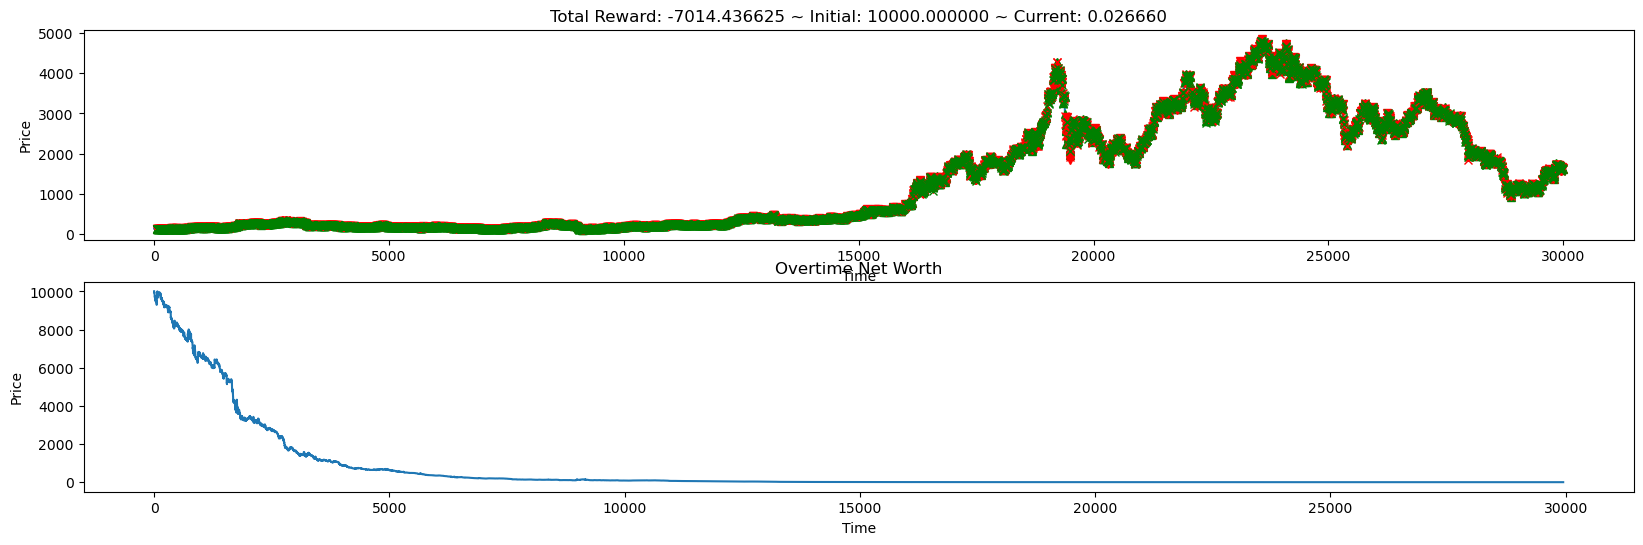

In [4]:
observation = env_train.reset()
while True:
    action = env_train.action_space.sample()
    observation, reward, done, info = env_train.step(action)
    # print(observation)
    # env.render()
    if done:
        print("info:", info)
        break

env_train.render_all()

In [5]:
models_dir = "models/test"
logdir = "logs"

if not os.path.exists(models_dir):
    os.makedirs(models_dir)

if not os.path.exists(logdir):
    os.makedirs(logdir)

# model_path = f"{models_dir}/810000002023-05-11 03 09 47.zip"

# model = DQN.load(model_path, env_train, verbose=1, tensorboard_log=logdir)
# print(f"Model loaded from: {model_path}")

# model = DQN("MlpPolicy", env_train, verbose=1, policy_kwargs=dict(net_arch=[50,50]), tensorboard_log=logdir)\
policy_kwargs = dict(net_arch=dict(pi=[128, 128,],
                                   vf=[128, 128]))
model = PPO("MultiInputPolicy", env_train, policy_kwargs=policy_kwargs, verbose=1, tensorboard_log=logdir)
# model = PPO.load(model_path, env_train, verbose=1)






Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


In [6]:
TIMESTEPS =  1_000_000
i = 0

# # # client.submit(model.learn, total_timesteps=TIMESTEPS, reset_num_timesteps=False, log_interval=100)

while i < 1:
    start_time = time.time()
    model.learn(total_timesteps=TIMESTEPS,
                reset_num_timesteps=False, log_interval=100)
    print("--- %s seconds ---" % (time.time() - start_time))
    model.save(f"{models_dir}/{TIMESTEPS*i}"+datetime.utcnow().strftime('%Y-%m-%d %H %M %S'))
    i += 1

model.save(f"{models_dir}/pnl_normalized"+datetime.utcnow().strftime('%Y-%m-%d %H %M %S'))

env_train.render_all()

Logging to logs/PPO_0


KeyboardInterrupt: 

In [7]:
print(len(df))


35749


diff 30000
tickers 30000
prices 30000
{'pnl': 5.486857783468125, 'pnl_perc': 0.05492344641251592, 'quantity': 74.9775592165265, 'price_difference': 0.07318000000003622, 'duration in mins': 2, 'start': 51, 'end': 53, 'entry_price': 133.24, 'exit_price': 133.58, 'position': 'long', 'net_worth': 10005.486857783468}
{'pnl': -19.24440360198892, 'pnl_perc': -0.1925308411214926, 'quantity': 74.73264573022094, 'price_difference': -0.25750999999999635, 'duration in mins': 2, 'start': 54, 'end': 56, 'entry_price': 133.75, 'exit_price': 133.76, 'position': 'long', 'net_worth': 9986.242454181478}
{'pnl': -7.279024931588131, 'pnl_perc': -0.07281763826604959, 'quantity': 74.7103041320953, 'price_difference': -0.09742999999997437, 'duration in mins': 1, 'start': 57, 'end': 58, 'entry_price': 133.8, 'exit_price': 133.63, 'position': 'short', 'net_worth': 9978.96342924989}
{'pnl': 543.2161543467587, 'pnl_perc': 5.438169425511203, 'quantity': 74.81800900031101, 'price_difference': 7.2605000000000075, 'd

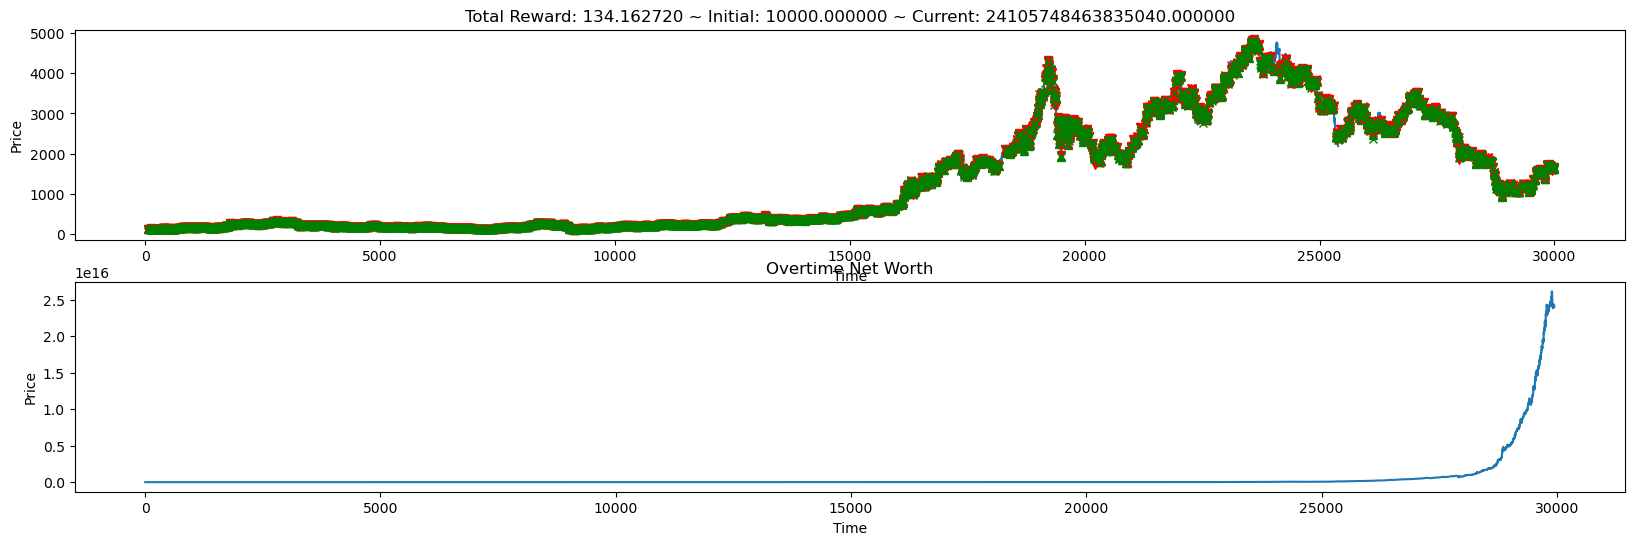

In [8]:
env_test = gym.make('stocks-v0', df=df, dfs=dfs, frame_bound=(50, 30000), window_size=50, prediction_size=20, target_percentage=1.0, stoploss_percentage=1.0, isTraining=False)

obs = env_test.reset()
i = 0
while True:
    i += 1
    action, _states = model.predict(obs, deterministic=True)
    obs, reward, dones, info = env_test.step(action)
    # if i> 175:
    #     print(action)
    # env.render()
    if dones:
        # print("info:", info)
        break

env_test.render_all()